# **Лабораторна робота №4 - Робота з нейромережею для класифікації речей**

Нижче наведено приклад, згаданий в презентації, який стосується побудови багатошарового перцептрона та його візуалізації.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

None


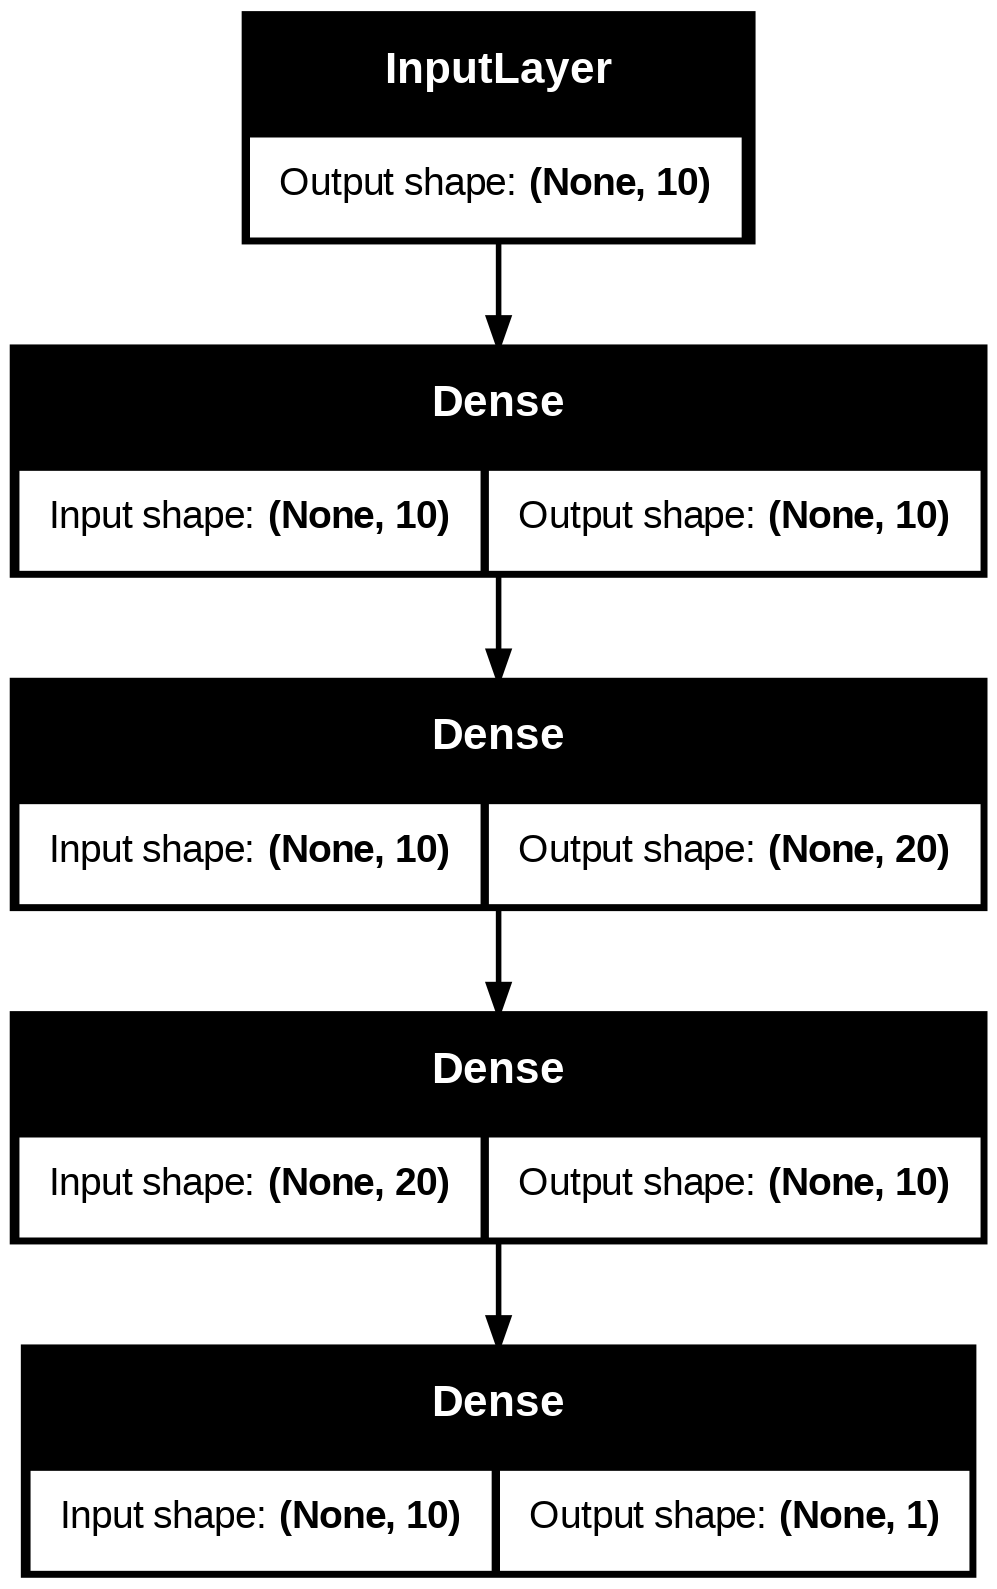

In [ ]:
# Install the required packages for plotting the model
!pip install pydot
!apt-get install graphviz

# Import the necessary modules
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the MLP model
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

# Summarize the model
print(model.summary())

# Plot and save the model
plot_model(model, to_file="multilayer_perceptron_graph.png", show_shapes=True)


## **Побудова нейромережі** відбуватиметься для того, аби **класифікувати предмети з датасету Fasion MNIST** й в результаті передати на вхід моделі певне зображення, щоб дізнатися, до якого класу воно належить (це буде виконано шляхом завантаження фото у вигляді файлу, який додано до цього завдання)

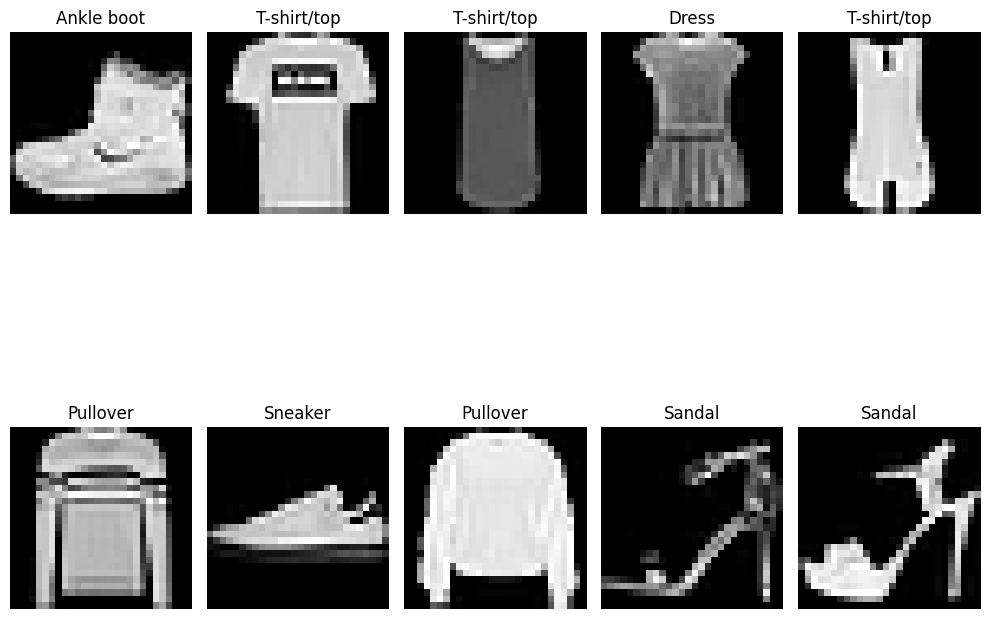

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7771 - loss: 0.6182 - val_accuracy: 0.8467 - val_loss: 0.4254
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8568 - loss: 0.3905 - val_accuracy: 0.8516 - val_loss: 0.4103
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8734 - loss: 0.3432 - val_accuracy: 0.8666 - val_loss: 0.3694
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8830 - loss: 0.3113 - val_accuracy: 0.8649 - val_loss: 0.3695
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8907 - loss: 0.2965 - val_accuracy: 0.8674 - val_loss: 0.3779
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8954 - loss: 0.2804 - val_accuracy: 0.8745 - val_loss: 0.3473
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9005 - loss: 0.2656 - val_accuracy: 0.8771 - val_loss: 0.3368
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9064 - loss: 0.2486 - val_accuracy: 0.

Валідаційна точність: 0.8881


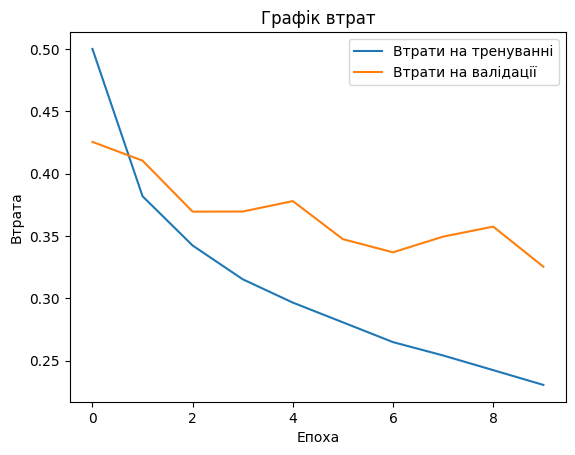

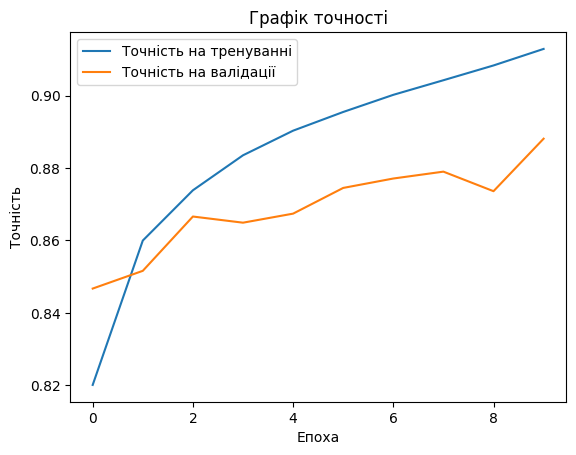

In [ ]:
# Багатошаровий персептрон для класифікації одягу з датасета Fashion MNIST

# Імпортуємо необхідні бібліотеки
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Завантажуємо датасет Fashion MNIST
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

class_names = [
    'T-shirt/top',   # 0
    'Trouser',       # 1
    'Pullover',      # 2
    'Dress',         # 3
    'Coat',          # 4
    'Sandal',        # 5
    'Shirt',         # 6
    'Sneaker',       # 7
    'Bag',           # 8
    'Ankle boot'     # 9
]


# Plot the first 10 images from the training set
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# - `x_train` та `x_val` містять зображення одягу розміром 28x28 пікселів
# - `y_train` та `y_val` містять правильні мітки класів для кожного зображення

# Перетворюємо мітки класів у формат one-hot encoding
# One-hot encoding перетворює мітку класу в вектор, де 1 відповідає класу, а решта - 0
y_train_oh = to_categorical(y_train, 10)
y_val_oh = to_categorical(y_val, 10)

# Нормалізуємо зображення
# Для прискорення навчання моделі, ділимо інтенсивність пікселів на 255 і переводимо значення в діапазон [-0.5, 0.5]
x_train_float = x_train.astype(np.float32) / 255 - 0.5
x_val_float = x_val.astype(np.float32) / 255 - 0.5

# Створюємо модель багатошарового персептрона (MLP)
# - Вхідний шар: 784 нейрони (28x28)
# - Два приховані шари по 128 нейронів з функцією активації `elu`
# - Вихідний шар: 10 нейронів для 10 класів з функцією активації `softmax`
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(28*28,), activation='elu'))  # перший прихований шар
model.add(layers.Dense(128, activation='elu'))  # другий прихований шар
model.add(layers.Dense(10, activation='softmax'))  # вихідний шар

# Компілюємо модель
# Використовуємо оптимізатор `adam`, функцію втрат `categorical_crossentropy`, та метрику `accuracy`
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Навчаємо модель
# - Розмір міні-батчу: 64
# - Кількість епох: 10
# Потрібно перетворити зображення у вектори розміром 784
history = model.fit(
    x_train_float.reshape(-1, 28*28),  # розгортаємо 28x28 в 784
    y_train_oh,
    batch_size=64,
    epochs=10,
    validation_data=(x_val_float.reshape(-1, 28*28), y_val_oh)
)

# Оцінка моделі
# Оцінюємо модель на валідаційному наборі
val_loss, val_accuracy = model.evaluate(x_val_float.reshape(-1, 28*28), y_val_oh)
print(f"Валідаційна точність: {val_accuracy:.4f}")

# можемо зберегти модень за потреби
# model.save('fashion_mnist_model.h5')

# Візуалізація навчання
import matplotlib.pyplot as plt

# Побудуємо графік втрат під час навчання
plt.plot(history.history['loss'], label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.title('Графік втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

# Побудуємо графік точності
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.title('Графік точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()


# На вхід моделі передаємо завантажений файл зображення (у цьому випадку це светр), який ми перетворюємо до потрібного формату й визначаємо за допомогою моделі його клас.

Saving sample_image.png to sample_image (1).png


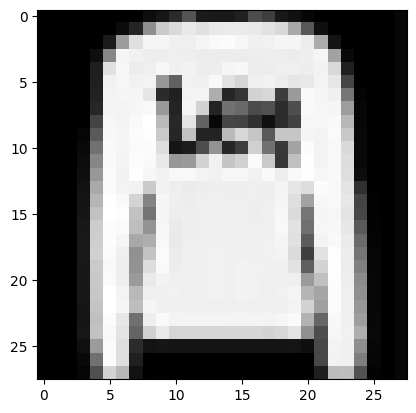

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Передбачений клас: Светр


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Завантажуємо модель
model = load_model('fashion_mnist_model.h5')

# Словник для розпізнавання класів
class_names = ['Футболка', 'Штани', 'Светр', 'Сукня', 'Пальто', 'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Черевики']

# Функція для завантаження зображення користувачем
def upload_and_predict():
    # Завантаження файлу
    uploaded = files.upload()

    # Обробка зображення
    for fn in uploaded.keys():
        # Відкриваємо зображення
        img = Image.open(fn).convert('L')  # Перетворюємо в чорно-біле

        # Змінюємо розмір на 28x28
        img = img.resize((28, 28))

        # Показуємо зображення
        plt.imshow(img, cmap='gray')
        plt.show()

        # Перетворюємо зображення в масив та нормалізуємо до [-0.5, 0.5]
        img_array = np.array(img).astype(np.float32) / 255 - 0.5

        # Розгортання зображення у вектор розміром 784
        img_array = img_array.reshape(1, 28*28)

        # Передбачення класу
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)

        # Виведення результату
        print(f"Передбачений клас: {class_names[predicted_class]}")

# Викликаємо функцію завантаження і передбачення
upload_and_predict()
